# Analysis on the impact of Laptop on academic performance of NEU's students

The data is based on the survey among 66 students about how to they value their laptop via Google Form.
The raw data in Google Form will be cleaned, and then it will be analyze to find the relationship between laptops and their performance.
Some information has already been extracted in Google Form Summary. We will use JupyterNotebook to find the rest infomation

This material is for English 100 final report

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv(r'KHẢO SÁT NHÓM 5.csv')

# Clean data for analysis

In [3]:
df2=df.rename({'Cho chúng mình biết bạn đang là sinh viên khóa bao nhiêu ?': 'Year','Chuyên ngành của bạn là gì ? ':'Major','Giới tính của bạn':'Gender','Bạn đang sử dụng laptop hãng nào ?':'Brand','Mẫu máy của bạn là gì ?':'Model','Mức độ hài lòng về chiếc laptop của bạn':'Overall_satisfaction',
          'Đánh giá sơ bộ laptop của bạn [Chất lượng hoàn thiện]':'Build_quality','Đánh giá sơ bộ laptop của bạn [Thiết kế]':'Design','Đánh giá sơ bộ laptop của bạn [Thời lượng pin]':'Battery_life','Thời lượng sử dụng laptop của bạn mỗi ngày':'Time_usage','Mục đích sử dụng laptop của bạn là gì\n(Bạn có thể chọn nhiều hơn 1 câu trả lời)':'Purpose',
          'Laptop có giúp ích trong việc học và làm của bạn không':'Useful','Bạn có sử dụng laptop khi lên lớp không ?':'Class_use','Bạn có thường bị mất tập trung khi sử dụng laptop cho việc học không ?':'Distraction_rate','Bạn dành bao nhiêu tiền để mua laptop (đơn vị Triệu đồng)':'Budget',
          'Nếu được chọn lại, bạn sẽ chọn mẫu máy laptop nào? Tại sao?':'Rechoose','Thời lượng sử dụng laptop của bạn trong việc học trong 1 ngày':'Time_study','Trên thang điểm 1-5 hãy đánh giá khả năng sử dụng máy tính của bạn (1: Mới sử dụng, 5: Thành thạo)':'Skill','Bạn đã từng sử dụng mẹo để tăng tốc độ xử lý của máy tính chưa?':'Trick','Đánh giá sơ bộ laptop của bạn [Hiển thị]':'Display','Đánh giá sơ bộ laptop của bạn [Độ di động (gọn nhẹ)]':'Portable','Đánh giá sơ bộ laptop của bạn [Hiệu năng]':'Power','Đánh giá sơ bộ laptop của bạn [Dịch vụ bảo hành]':'Customer_service'},
          axis=1)
df2['Major']=df2['Major'].str.lower()
df2['Budget'] = pd.to_numeric(df2['Budget'])
map1={'Bình thường':3,'Khá hài lòng':4,'Rất hài lòng':5,'Không hài lòng':2,'Thất vọng':1}
map2={'Đủ':4,'Ngoài mong đợi':5,'Bình thường':3}
map3={'Ít khi':2,'Thình thoảng':4,'Bình thường':3,'Thường xuyên':5,'Không':1}
map_price={'< 10':7.5,'10-15':12.5,'15-20':17.5,'20-25':22.5,'25+':30}
map_time={'2 - 4 tiếng':3,'30 phút - 1 tiếng':0.75,'1- 2 tiếng':1.5,'4 tiếng +':5,'ít hơn 30 phút':0.25}
gender={'Nam':'Men','Nữ':'Women','Bi':'Other'}
df2['Design']=df2['Design'].map(map1)
df2['Build_quality']=df2['Build_quality'].map(map1)
df2['Battery_life']=df2['Battery_life'].map(map1)
df2['Power']=df2['Power'].map(map1)
df2['Portable']=df2['Portable'].map(map1)
df2['Display']=df2['Display'].map(map1)
df2['Customer_service']=df2['Customer_service'].map(map1)
df2['Overall_satisfaction']=df2['Overall_satisfaction'].map(map1)
df2['Useful']=df2['Useful'].map(map2)
df2['Class_use']=df2['Class_use'].map(map3)
df2['Time_study']=df2['Time_study'].map(map_time)
df2['Time_usage']=df2['Time_usage'].map(map_time)
df2['Distraction_rate']=df2['Distraction_rate'].map(map3)
df2['Gender']=df2['Gender'].map(gender)

In [4]:
df2.to_csv('clean_neu_laptop.csv', index=True)

# Laptop in academic performance

### Learning quality over brands

In [5]:
#Learning over brands

df3=df2.groupby(['Brand'])[['Brand','Useful','Class_use','Time_study','Time_usage','Distraction_rate']].mean()
df3['Learn_rate']=(df3['Time_study']/df3['Time_usage'])*100
df3['Count']=df2['Brand'].value_counts()
df3.loc[df3['Count']>2].sort_values(by=['Useful'],ascending=False).round(2)

C:\Users\Admin\AppData\Local\Temp\ipykernel_26808\3400887872.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df3=df2.groupby(['Brand'])[['Brand','Useful','Class_use','Time_study','Time_usage','Distraction_rate']].mean()


,Useful,Class_use,Time_study,Time_usage,Distraction_rate,Learn_rate,Count
Brand,,,,,,,
MSI,4.75,3.25,2.25,4.00,3.75,56.25,4
Lenovo,4.67,4.33,3.08,5.00,3.67,61.67,6
HP,4.12,4.12,1.72,3.22,3.50,53.40,8
Acer,4.00,3.75,2.06,4.00,2.50,51.56,4
Asus,4.00,4.36,2.55,4.07,3.45,62.57,11
Dell,4.00,3.21,1.75,2.95,3.53,59.38,19
Macbook,3.90,4.40,1.82,2.95,3.30,61.86,10


In [6]:
df3['Count']=1
df3.groupby(['Count']).mean()

,Useful,Class_use,Time_study,Time_usage,Distraction_rate,Learn_rate
Count,,,,,,
1,4.244167,3.59325,2.423504,3.76843,3.569753,62.168646


### Learning quality over budget

In [7]:
#Learning over budget
df3=df2.groupby(['Budget'])[['Useful','Class_use','Time_study','Time_usage','Distraction_rate']].mean()
df3['Learn_rate']=(df3['Time_study']/df3['Time_usage'])*100
df3['Count']=df2['Budget'].value_counts()
df3.sort_values(by=['Time_study'],ascending=False).round(2)

,Useful,Class_use,Time_study,Time_usage,Distraction_rate,Learn_rate,Count
Budget,,,,,,,
30.0,4.36,3.93,2.66,4.12,3.36,64.50,14
7.5,4.00,3.33,2.42,3.83,3.67,63.04,3
22.5,4.08,4.25,2.19,3.58,3.17,61.05,12
17.5,4.05,3.76,2.11,3.68,3.62,57.28,21
12.5,4.12,3.50,1.64,2.81,3.50,58.33,16


In [8]:
df2['Major'].value_counts()

dseb                                             33
tài chính                                         6
mis                                               4
kiểm toán                                         4
luật                                              2
marketing                                         2
qtkd                                              2
logistics                                         2
it                                                2
ngôn ngữ anh                                      1
cntt                                              1
phân tích tài chính                               1
kinh tế đối ngoại                                 1
kinh doanh quốc tế                                1
thiết kế thời trang cho người ngoài hành tinh     1
hàn quốc học                                      1
toán kinh tế                                      1
xây dựng gia đình                                 1
Name: Major, dtype: int64

### Differences in using laptop for learning in genders

In [9]:
#Different gender
df3=df2.groupby(['Gender'])[['Brand','Useful','Class_use','Time_study','Time_usage','Distraction_rate']].mean()
df3['Learn_rate']=(df3['Time_study']/df3['Time_usage'])*100
df3.round(2)

C:\Users\Admin\AppData\Local\Temp\ipykernel_26808\3405677166.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df3=df2.groupby(['Gender'])[['Brand','Useful','Class_use','Time_study','Time_usage','Distraction_rate']].mean()


,Useful,Class_use,Time_study,Time_usage,Distraction_rate,Learn_rate
Gender,,,,,,
Men,4.33,3.78,2.24,3.76,3.52,59.61
Other,4.00,5.00,5.00,5.00,5.00,100.00
Women,4.00,3.79,1.99,3.37,3.37,59.18


### Learning over laptop' mastery

In [10]:
#Boost PC
df2['Trick'].value_counts()

Chưa từng    36
Đã từng      30
Name: Trick, dtype: int64

In [11]:
#Skill
df3=df2.groupby(['Skill'])[['Useful','Class_use','Time_study','Time_usage','Distraction_rate']].mean()
df3['Learn_rate']=(df3['Time_study']/df3['Time_usage'])*100
df3['Count']=df2['Skill'].value_counts()
df3.round(2)

,Useful,Class_use,Time_study,Time_usage,Distraction_rate,Learn_rate,Count
Skill,,,,,,,
2,4.40,4.40,1.55,3.40,3.60,45.59,5
3,4.10,3.39,1.85,3.05,3.45,60.58,31
4,4.12,4.12,2.27,4.02,3.33,56.48,24
5,4.17,4.17,3.62,4.42,3.83,82.08,6


In [12]:
### Learning over majors

In [13]:
#Create Field base on Major
div1 = {'Tech_related':['cntt','dseb','toán kinh tế','it','mis'],'Tech_not_related':['hàn quốc học','kinh doanh quốc tế','kinh tế đối ngoại','kiểm toán','logistics','luật','marketing','ngôn ngữ anh','phân tích tài chính','qtkd','tài chính']}
div2= dict()
for key,val in div1.items():
    for i in range(len(val)):
        div2[val[i]]=key
df2['Field']=df2['Major'].map(div2)

In [14]:
#Efficientcy depends on majors
df3=df2.groupby(['Field'])[['Useful','Class_use','Time_study','Time_usage','Distraction_rate']].mean()
df3['Learn_rate']=(df3['Time_study']/df3['Time_usage'])*100
df3.round(2)

,Useful,Class_use,Time_study,Time_usage,Distraction_rate,Learn_rate
Field,,,,,,
Tech_not_related,4.0,3.82,2.11,3.32,3.41,63.70
Tech_related,4.2,3.75,1.96,3.59,3.42,54.53


# Laptop in general

### Laptop quality over pricetags

In [15]:
#Quality over prices
df3=df2.groupby('Budget')[['Brand','Overall_satisfaction','Build_quality','Design','Battery_life']].mean()
df3['Count']=df2['Budget'].value_counts()
df3.round(2)

C:\Users\Admin\AppData\Local\Temp\ipykernel_26808\1441226345.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df3=df2.groupby('Budget')[['Brand','Overall_satisfaction','Build_quality','Design','Battery_life']].mean()


,Overall_satisfaction,Build_quality,Design,Battery_life,Count
Budget,,,,,
7.5,3.00,3.00,3.33,2.67,3
12.5,2.94,3.50,3.56,3.06,16
17.5,3.71,3.81,3.90,3.10,21
22.5,4.25,4.42,4.58,3.42,12
30.0,4.36,4.14,4.57,3.79,14


### Laptop in different brands

In [16]:
df2['Brand'].value_counts()

Dell                 19
Asus                 11
Macbook              10
HP                    8
Lenovo                6
MSI                   4
Acer                  4
Alienware             2
Microsoft Surface     1
Tongfang              1
Name: Brand, dtype: int64

In [17]:
budget=df3.index.values.tolist()

In [18]:
#Quality over brands
df3=df2.groupby(['Brand'])[['Brand','Overall_satisfaction','Build_quality','Design','Battery_life','Budget']].mean()
df3['Count']=df2['Brand'].value_counts()
df3.loc[df3['Count']>2].sort_values(by=['Overall_satisfaction'],ascending=False).round(2)

C:\Users\Admin\AppData\Local\Temp\ipykernel_26808\2538056421.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df3=df2.groupby(['Brand'])[['Brand','Overall_satisfaction','Build_quality','Design','Battery_life','Budget']].mean()


,Overall_satisfaction,Build_quality,Design,Battery_life,Budget,Count
Brand,,,,,,
Macbook,4.30,4.60,4.90,4.40,26.25,10
Lenovo,3.83,4.00,4.17,3.17,24.17,6
Acer,3.75,4.00,4.50,3.50,20.62,4
Asus,3.73,3.73,4.00,2.91,17.05,11
Dell,3.68,3.74,3.89,2.95,17.37,19
MSI,3.25,3.50,3.25,2.75,16.25,4
HP,3.00,3.75,3.50,3.62,13.75,8


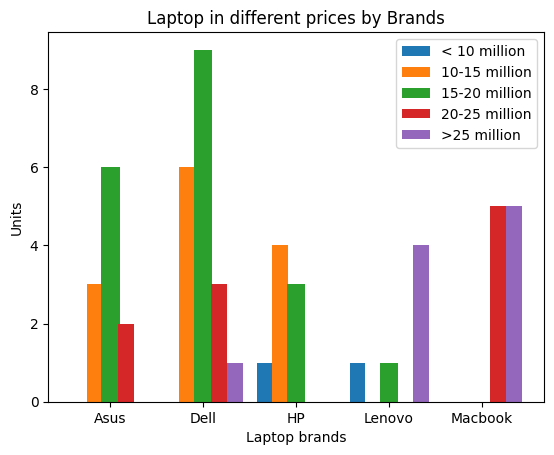

In [19]:
#Pricetags of top 5 laptop' manufacture
price_index=dict()
brand=df3.loc[df3['Count']>5].index.values.tolist()
for price in budget:
    price_index[price]=[]
    for lap in brand:
        try:
            x=int(df2.loc[df2['Budget']==price]['Brand'].value_counts()[lap])
        except:
            x=0            
        price_index[price].append(x)
      

x=np.arange(len(brand))

plt.bar(x - 0.34,price_index[7.5] , 0.17, label = '< 10 million')
plt.bar(x - 0.17,price_index[12.5] , 0.17, label = '10-15 million')
plt.bar(x ,price_index[17.5] , 0.2, label = '15-20 million')
plt.bar(x + 0.17,price_index[22.5] , 0.17, label = '20-25 million')
plt.bar(x + 0.34, price_index[30], 0.17, label = '>25 million')
plt.xticks(x,brand)

plt.xlabel("Laptop brands")
plt.ylabel("Units")
plt.title("Laptop in different prices by Brands")
plt.legend()
plt.show()


### Laptop in genders

In [20]:
def count_lap(brand,gen):
	try:
		x=df2.loc[df2['Gender']==gen]['Brand'].value_counts()[brand]
	except:
		x=0
	return x
df_g=pd.DataFrame({'Men':[count_lap(brand[x],'Men') for x in range(len(brand))],
                  'Women':[count_lap(brand[x],'Women') for x in range(len(brand))]},
                 index=brand)


In [21]:
#Top brand loved by women
df_g['Women'].sort_values(ascending=False)

Dell       13
Asus       10
Macbook     6
HP          3
Lenovo      2
Name: Women, dtype: int64

In [22]:
#Top brand loved by men
df_g['Men'].sort_values(ascending=False)

Dell       6
HP         5
Lenovo     4
Macbook    4
Asus       1
Name: Men, dtype: int64

In [23]:
#Efficientcy depends on majors
df2['Count']=1
df3=df2.groupby(['Field','Rechoose'])[['Overall_satisfaction']].mean()
df3['Count']=df2.groupby(['Field','Rechoose']).sum()['Count']
df3.T.round(2).loc[['Count']]

C:\Users\Admin\AppData\Local\Temp\ipykernel_26808\3813089186.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df3['Count']=df2.groupby(['Field','Rechoose']).sum()['Count']


Field    Tech_not_related                                                      \
Rechoose     Acer Nitro 5 Asus  Lenovo Legion 5 MacBook Pro Macbook Rog Strix   
Count                 1.0   1.0             1.0         1.0     3.0       1.0   

Field                                Tech_related                            \
Rechoose lenovo thinkbook slim 7 pro Acer Nitro 5 Asus Dell Dell XPS Lenovo   
Count                 1.0        1.0          1.0  1.0  1.0      1.0    2.0   

Field                                                                    
Rechoose Macbook Macbook M2 Macbook Pro Mình chưa cân nhắc Thinkpad p52  
Count        7.0        1.0         3.0                1.0          1.0